In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [39]:
digit = load_digits()

In [40]:
#deteremine the number of digits and labels
print("Image data shape" , digit.data.shape)
print("Label data shape",digit.target.shape)


Image data shape (1797, 64)
Label data shape (1797,)


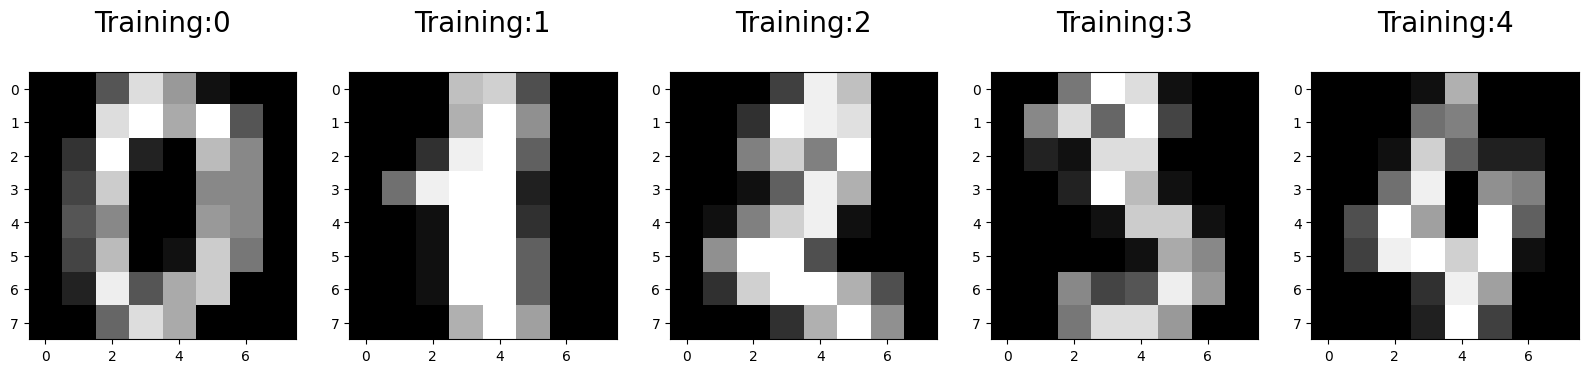

In [41]:
plt.figure(figsize=(20,6))
for index,(image,label) in enumerate(zip(digit.data[0:5],digit.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training:%i\n' % label,fontsize=20)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(digit.data,digit.target,test_size=0.2,random_state=2)

In [43]:
x_train.shape

(1437, 64)

In [44]:
y_train.shape

(1437,)

In [45]:
x_test.shape

(360, 64)

In [46]:
y_test.shape

(360,)

In [47]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(x_train,y_train)

c:\Users\Preethi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_predict = logisticRegression.predict(x_test)
print(y_predict)

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 8 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 8 9 6 1 7 0 1 9 7 3 3 1 8 8 8 9 8 5 8 4 9 3 5 8 4 3 9 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 1 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 8 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 8 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 4 0 4 0 0 9 0 6 5 8 8
 3 7 9 2 0 8 2 7 3 0 2 1 5 2 7 0 6 9 3 3 1 3 5 2 8 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 9 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 3 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 9 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 4 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 1 5 7 8 0 4 1 4 5]


In [49]:
logisticRegression.predict(x_test[0:5])

array([4, 0, 9, 1, 8])

In [50]:
accuracy = metrics.accuracy_score(y_predict,y_test)
print(accuracy)

#or
# accuracy =logisticRegression.score(x_test,y_test)
# print(accuracy)


0.9444444444444444


In [51]:
#greater the number in diagonal greater the accuracy
cm=metrics.confusion_matrix(y_predict,y_test) 
print(cm)

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  1  1  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  1  0 33  0  0  0  0  0  1]
 [ 1  0  0  0 31  1  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  1]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  1  0  0  0 39  0  0]
 [ 0  1  0  2  3  0  1  0 35  1]
 [ 0  1  0  0  1  0  0  1  1 25]]


In [15]:
#now show this confusion matrix in a heatmap for better visual understandings

Text(0.5, 1.0, 'Accuracy Score 0.9444444444444444')

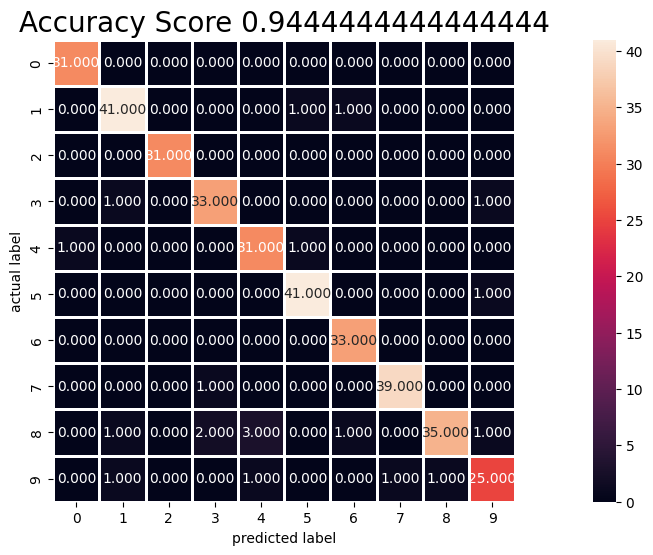

In [52]:
plt.figure(figsize=(20,6))
sns.heatmap(cm,annot=True,square=True,fmt='.3f',color='blue',linewidths=0.9)
plt.xlabel('predicted label')
plt.ylabel('actual label')
title=f'Accuracy Score {accuracy}'
plt.title(title,fontsize=20)

In [53]:
index=0
classifiedIndex=[]
for predict,actual in zip(y_predict,y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index+=1    

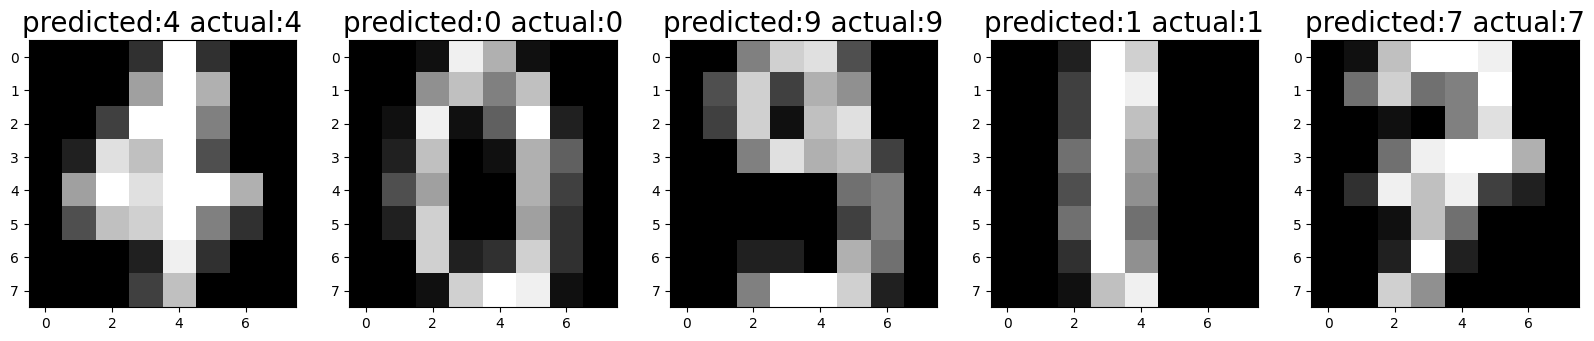

In [54]:
plt.figure(figsize=(20,6))
for i,b in enumerate(classifiedIndex[0:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(x_test[b],(8,8)),cmap=plt.cm.gray)
    plt.title(f'predicted:{y_predict[b]} actual:{y_test[b]}' , fontsize=20)